In [219]:
#importing the necessary libraries

#numpy and pandas package
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing the warnings
import warnings

#configuration settings
%matplotlib inline
warnings.filterwarnings('ignore') ## Surpress the warnings

from sklearn import datasets
from scipy import stats

#### -The dataset used was obtained from www.kaggle.com

</font>
The dataset has the structure below:

| Column Name| Description| Type | Sample Values |
|---- |----|----|----|
| Churn  | Refers to terminating a subscription to a service |Categorical |0=Non-churners,1=Churners |
| Account weeks(tenure) |Refers to the number of weeeks a customer has been with the company. |Numerical | Random numbers=141,65.. |
| Contract Renewal  | Refers to the renewal of the agreement between a customer and company | Categorical| 0=No,1=Yes |
|Data plan  |Refers to the subscription of bundle offers offered by the company  | Categorical |  0=No,1=Yes |
|CustServCalls|Refers to the number of calls a customer has made to report a problem.|Numerical|eg:1call,2calls,3calls|
|Day mins|refers to number of callminutes spent during the day by a customer.|Numerical|eg:32,12,60|
|Day calls|Refers to the number of day calls made by a customer.|Numerical| eg:110,76|
|Monthly Charge|Refers to the bill that is sent to the customer at the end of the month|Numerical|eg:56.4,43.2,78.7|
|Overage fee|An extra amount of money that you have to pay for using more of something than was expected or agreed.|Numerical|eg:9.87,6.2,...|
|Roam minutes|Refers to the minutes spent by a customer when your outside your network's boundary.|Numerical|56,7.8,...|



In [250]:
#loading the data
df=pd.read_csv('churn_predictor.csv')
pd.set_option('display.max_rows',df.shape[0]+1)
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## 1.Hypothesis Generation
#### - Based on the domain knowlegde ,most studies utilize billing information,usage behaviour(minutes used in a day,amount of data used,calls made to customer care services,etc) and past churning status.
### a)BILLING INFORMATION
#### -Does the monthly charge influence churning of a customer?
#### -Does the overage fee influence churning of a customer?

### b)BEHAVIOURIAL
#### -High day mins,likely to churn?
#### -Will high number of  customer service calls results to high churn rate?
#### -Does high amount of data usage result to high churn rate?



## Variable Identification and Type casting.

In [ ]:
### Data category
## continuous variables-Account weeks,Data usage,cust serv calls,Day mins,Day calls,Monthly Charge,Overage fee,Roam mins.
## categorical variables-Churn,Contract renewal,Data plan.

### Type of Variable.
## target variable- churn
## predictor variables-


In [221]:
#more info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [222]:
#typecasting "churn","contract renewal" and "Dataplan" to category type
df['Churn'] = df['Churn'].astype('category')
df['ContractRenewal'] =df['ContractRenewal'].astype('category')
df['DataPlan'] = df['DataPlan'].astype('category')


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Churn            3333 non-null   category
 1   AccountWeeks     3333 non-null   int64   
 2   ContractRenewal  3333 non-null   category
 3   DataPlan         3333 non-null   category
 4   DataUsage        3333 non-null   float64 
 5   CustServCalls    3333 non-null   int64   
 6   DayMins          3333 non-null   float64 
 7   DayCalls         3333 non-null   int64   
 8   MonthlyCharge    3333 non-null   float64 
 9   OverageFee       3333 non-null   float64 
 10  RoamMins         3333 non-null   float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 218.6 KB


In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Univariate missing values

In [7]:
#checking for missing values
df.apply(lambda x: sum(x.isnull()))

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Graphical visualizations to understand the data distribution.

# Univariate Analysis: Numerical Variables

Skewness: 0.09656281161489656


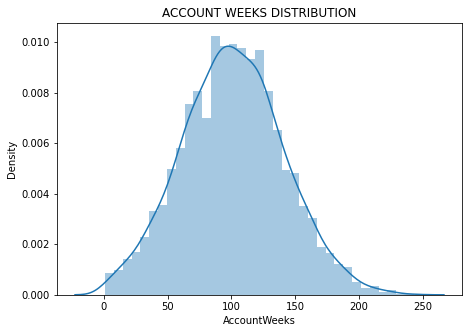

In [28]:
##ACCOUNT WEEKS ANALYSIS
#print account week skewness
print('Skewness:',stats.skew(df['AccountWeeks']))
print('Kurtosis:',stats.skew(df['']))
#account weeks density plot
accountWeeks=df['AccountWeeks']
#converting the data into an array
accountWeeks_array=np.array(accountWeeks)
#generating a dist plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(accountWeeks)
plt.title('ACCOUNT WEEKS DISTRIBUTION')
plt.show()

## ***Insights drawn:***
#### -Accounts week distribution is symmetric (normal distribution) in shape.

In [224]:
dfNonchurners=df.loc[df['Churn']==0]
dfChurners=df.loc[df['Churn']==1]


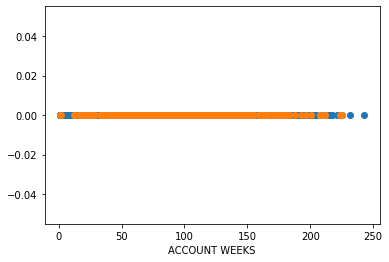

In [229]:
# creating a plot
plt.plot(dfNonchurners['AccountWeeks'],np.zeros_like(dfNonchurners['AccountWeeks']),'o')
plt.plot(dfChurners['AccountWeeks'],np.zeros_like(dfChurners['AccountWeeks']),'o')
plt.xlabel('ACCOUNT WEEKS')
plt.show()

Skewness 1.2714847601970785


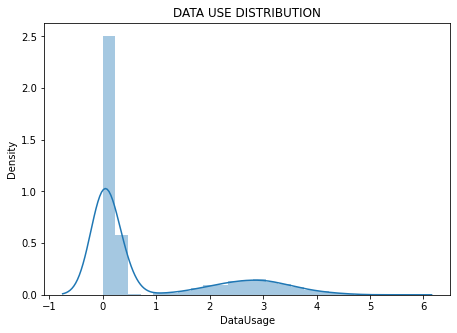

In [29]:
## DATA USAGE ANALYSIS
#print data usage skewnesss
print('Skewness',stats.skew(df['DataUsage']))

#extracting the data usage variable
dataUse=df['DataUsage']
#plotting the density plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataUse)
plt.title('DATA USE DISTRIBUTION')
plt.show()

## *** Insights drawn:****
#### - Data usage variable is positively skewed with a skewness level of 1.2714.

Skewness: 1.090868260175501


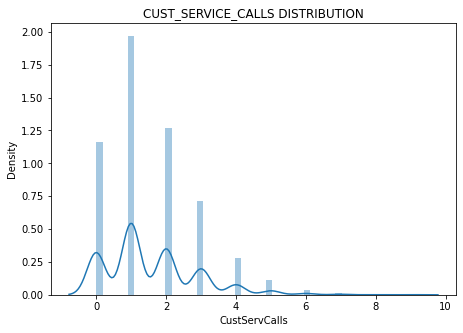

In [31]:
## CUSTOMER SERVICE CALLS ANALYSIS
#print  customer service calls skewness
print('Skewness:',stats.skew(df['CustServCalls']))

#Extracting the customer service calls
servCalls=df['CustServCalls']
#plotting the densityplot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(servCalls)
plt.title('CUST_SERVICE_CALLS DISTRIBUTION')
plt.show()

Skewness: -0.029063979518119797


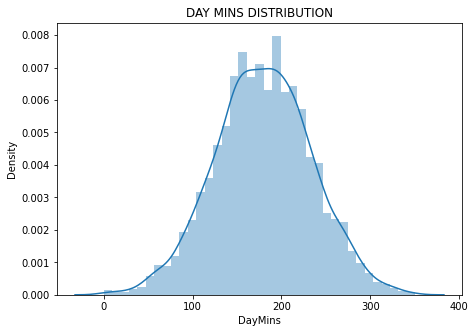

In [32]:
## DAY MINS ANALYSIS
#print skewness
print('Skewness:',stats.skew(df['DayMins']))

#Extracting the day mins column
daymins=df['DayMins']
#plotting the density plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(daymins)
plt.title('DAY MINS DISTRIBUTION')
plt.show()


Skewness: -0.11173632373075189


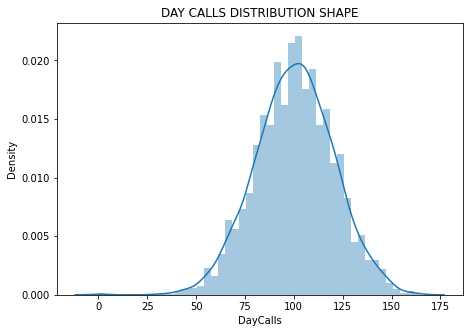

In [33]:
##DAY CALLS ANALYSIS
#print skewness
print('Skewness:',stats.skew(df['DayCalls']))

#Extracting the day calls column
daycalls=df['DayCalls']
#plotting the density plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(daycalls)
plt.title('DAY CALLS DISTRIBUTION SHAPE')
plt.show()

Skewness: 0.5942302192305792


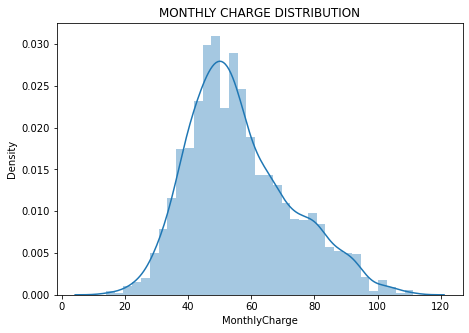

In [34]:
# MONTHLY CHARGE ANALYSIS
#print skewness
print('Skewness:',stats.skew(df['MonthlyCharge']))

#Extraacting the monthly charge
monthcharge=df['MonthlyCharge']
#plotting the density plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(monthcharge)
plt.title('MONTHLY CHARGE DISTRIBUTION')
plt.show()


Skewness: -0.023834607991483656


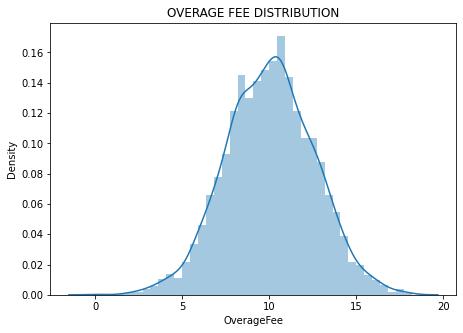

In [36]:
# OVERAGE FEE ANALYSIS
#print skewness
print('Skewness:',stats.skew(df['OverageFee']))

#extracting overage column
overfee=df['OverageFee']
#plotting the densityplot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(overfee)
plt.title('OVERAGE FEE DISTRIBUTION')
plt.show()

Skewness: -0.24502560348664432


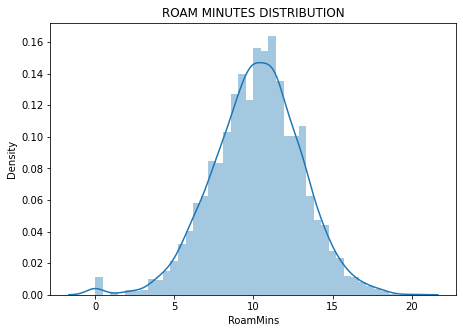

In [37]:
## ROAM MINUTES
#print skewness
print('Skewness:',stats.skew(df['RoamMins']))

#extracting the roam minutes column
roammins=df['RoamMins']
#plotting the density plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(roammins)
plt.title('ROAM MINUTES DISTRIBUTION')
plt.show()

# Univariate Analysis:Categorical Variables

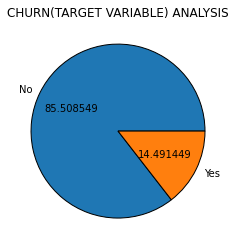

In [68]:
# TARGET VARIABLE-CHURN
#extracting the churn varriable
churn=df['Churn']
#value count
churn.value_counts()
#creating pie chart slices
slices=[2850,483]
#creating labels
labels=['No','Yes']
#plotting a pie chart
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},autopct='%2f')
plt.title('CHURN(TARGET VARIABLE) ANALYSIS')
plt.show()


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

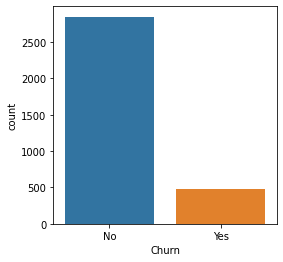

In [255]:
fig=plt.figure(figsize=(4,4))
churn=sns.countplot(df.Churn)
churn.set_xticklabels(['No','Yes'])


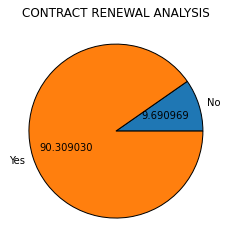

In [63]:
#CONTRACT RENEWAL ANALYSIS
#extracting the variable
contrenew=df['ContractRenewal']
#value count
contrenew.value_counts()
#creating the slices
slice=[323,3010]
#labels
labels=['No','Yes']
#pie chart
plt.pie(slice,labels=labels,autopct='%2f',wedgeprops={'edgecolor':'black'})
plt.title('CONTRACT RENEWAL ANALYSIS')
plt.show()


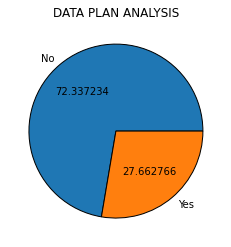

In [64]:
#DATA PLAN ANALYSIS
#extracting the variable
dataplan=df['DataPlan']
#value count
dataplan.value_counts()
#creating slices
slice=[2411,922]
#labels
label=['No','Yes']
#plotting the pie chart
plt.pie(slice,labels=label,autopct='%2f',wedgeprops={'edgecolor':'black'})
plt.title('DATA PLAN ANALYSIS')
plt.show()

# BIVARIATE ANALYSIS

# i)Numerical-Numerical Variables

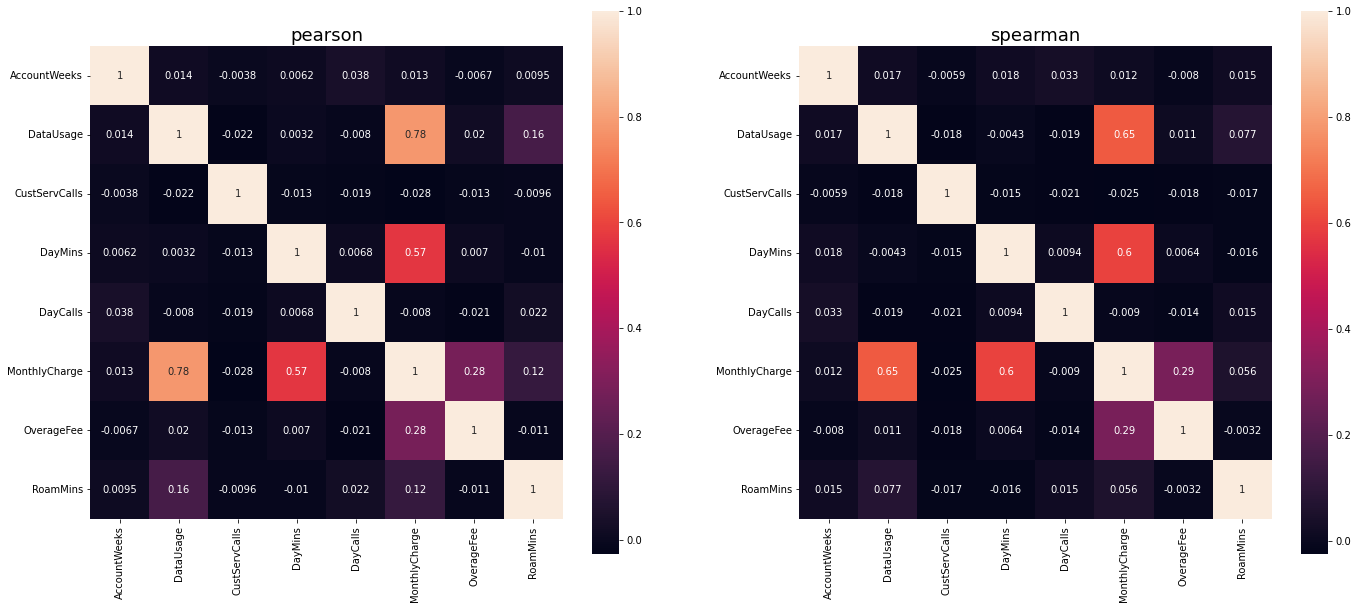

In [74]:
#correlation matrix

plt.figure(figsize=(36,10))
#create a loop through all statistical correlation methods
for j,i in enumerate(['pearson','spearman']):
    plt.subplot(1,3,j+1)
    correlation=df.corr(method=i)
    sns.heatmap(correlation,square=True,annot=True)
    plt.title(i,fontsize=18)
    

#### *The variables with insignficant correlation are:account weeks,customer service calls,day calls.
#### *Major correlation lies between data usage,day mins,monthly charge,overage fee and roam mins.

# ii)Categorical-Categorical Variables-(CHI-SQUARE TEST STATISTIC)

In [76]:
## Categorical variables: Data plan,contract renewal,Churn(target variable).

### Is their association between a customer's subscription to a data plan and the churn rate?

In [93]:
#forming a crosstab
Dataplan_table=pd.crosstab(df['DataPlan'],df['Churn'],margins=True)
Dataplan_table.columns=['Non_churn','Churn','rowTotal']  #column headings
Dataplan_table.index=['No_Dplan','Yes_Dplan','colTotal']  #row headings

observed=Dataplan_table.iloc[0:2,0:2]

Dataplan_table


,Non_churn,Churn,rowTotal
No_Dplan,2008,403,2411
Yes_Dplan,842,80,922
colTotal,2850,483,3333


In [107]:
#calculating our expected values
expected=np.outer(Dataplan_table['rowTotal'][0:2],Dataplan_table.loc['colTotal'][0:2])/3333
expected=pd.DataFrame(expected)
expected.columns=['Non_churn','Churn']
expected.index=['No_Dplan','Yes_Dplan']
expected

,Non_churn,Churn
No_Dplan,2061.611161,349.388839
Yes_Dplan,788.388839,133.611161


In [110]:
#chi square statistic
chi_squared_stat=(((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

#calculating our critical value
crit=stats.chi2.ppf(q=0.95,df=1) #critical value for 95% confidence interval
print('Critical value:',crit)

# calculating the p_value
p_value=1-stats.chi2.cdf(x=chi_squared_stat,df=1)
print('P_value:',p_value)

1.3941312748140602
Critical value: 3.841458820694124
P_value: 0.23770866334418117


###  ***Insights from the analysis***
#### -The p-value is greater than 0.05,thus implying their is no association between a customer's subscription to a data plan and the churn rate.

### Is their association between a customer renewing their contract and the churn rate??

In [124]:
#forming a crosstab
contract_table=pd.crosstab(df['ContractRenewal'],df['Churn'],margins=True)
contract_table.columns=['Non_Churn','Churn','rowTotals']  #column headings
contract_table.index=['No_Contr','Yes_Contr','colTotals'] # row headings

observed2=contract_table.iloc[0:2,0:2]

contract_table
                              
                              

,Non_Churn,Churn,rowTotals
No_Contr,186,137,323
Yes_Contr,2664,346,3010
colTotals,2850,483,3333


In [127]:
#calculating our expected values
expected2=np.outer(contract_table['rowTotals'][0:2],contract_table.loc['colTotals'][0:2])/3333
expected2=pd.DataFrame(expected2)
expected2.columns=['Non_Churn','Churn']
expected2.index=['No_Contr','Yes_Contr']
expected2

,Non_Churn,Churn
No_Contr,276.192619,46.807381
Yes_Contr,2573.807381,436.192619


In [128]:
#chi square statistic
chi_squared_stat2=(((observed2-expected2)**2)/expected).sum().sum()
print(chi_squared_stat2)

#calculating our critical value
crit2=stats.chi2.ppf(q=0.95,df=1)  #critical value for confidence interval
print('Critical value:',crit)

# calculating the p-value
p_value2=1-stats.chi2.cdf(x=chi_squared_stat2,df=1)
print('p_value:',p_value2)


0.0
Critical value: 3.841458820694124
p_value: 1.0


### Insights from the analysis
#### **The p-value is greater than 0.05 thus we fail toreject the null hypothesis thus no association between the two variables

# iii)Categorical-Numerical Variables

In [ ]:
#churn,data plan,contract renewal
#Monthly charge,Data Usage,Day mins,Overage fee.

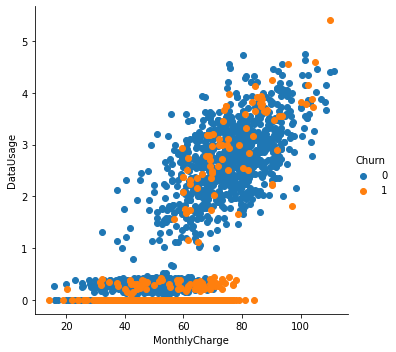

In [234]:
#Data Usage and monthly charge based on churn
sns.FacetGrid(df,hue='Churn',size=5).map(plt.scatter,'MonthlyCharge','DataUsage').add_legend();
plt.show()

### ***Insights drawn:***
#### -High monthly charge results to a high churn rate thus implying high correlation.
### -

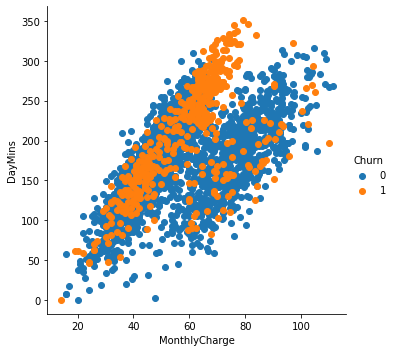

In [241]:
#Daymins and monthly charge
sns.FacetGrid(df,hue='Churn',size=5).map(plt.scatter,'MonthlyCharge','DayMins').add_legend();
plt.show()

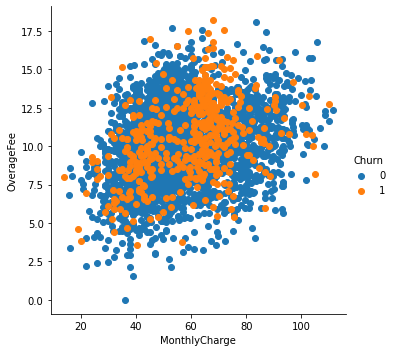

In [235]:
# OverageFee and MonthlyCharge
sns.FacetGrid(df,hue='Churn',size=5).map(plt.scatter,'MonthlyCharge','OverageFee').add_legend();
plt.show()

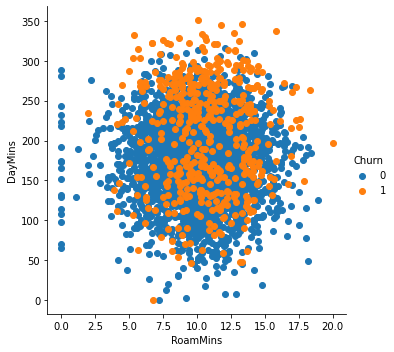

In [236]:
# Roam minutes and day minutes
sns.FacetGrid(df,hue='Churn',size=5).map(plt.scatter,'RoamMins','DayMins').add_legend();
plt.show()

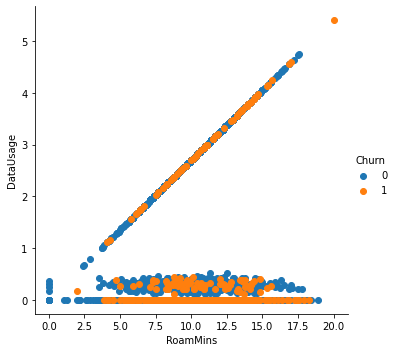

In [238]:
# Data Usage and Roam minutes
sns.FacetGrid(df,hue='Churn',size=5).map(plt.scatter,'RoamMins','DataUsage').add_legend();
plt.show()

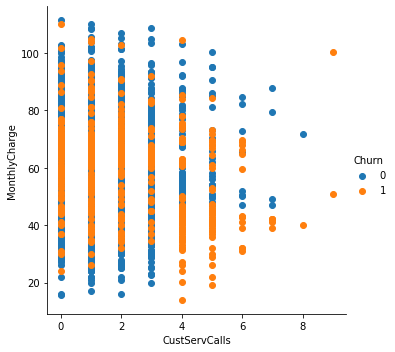

In [237]:
#customer service calls and monthly charge
sns.FacetGrid(df,hue='Churn',size=5).map(plt.scatter,'CustServCalls','MonthlyCharge').add_legend();
plt.show()

## ***Insights drawn from the analysis:***
#### -Since most relationship between the variables seem to be overlapping each other using a non-linear algorithm instead of a logistic regression alhorithm.

# MULTIVARIATE ANALYSIS

### CHURNING CUSTOMERS' PROFILE

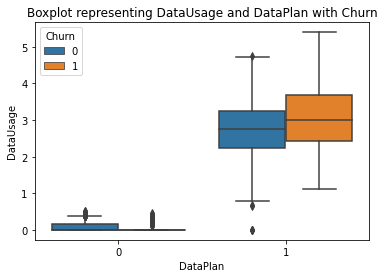

In [256]:
# contract renewal,Data plan and churn
#boxplot
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot representing DataUsage and DataPlan with Churn')

Grouped_Box_Plot(df,'DataUsage','DataPlan','Churn')

### Insights drawn; -Customers with a data plan and have high data usage are likely to churn

In [248]:
important=df[['MonthlyCharge','DayMins','OverageFee','CustServCalls','DataUsage','Churn']]


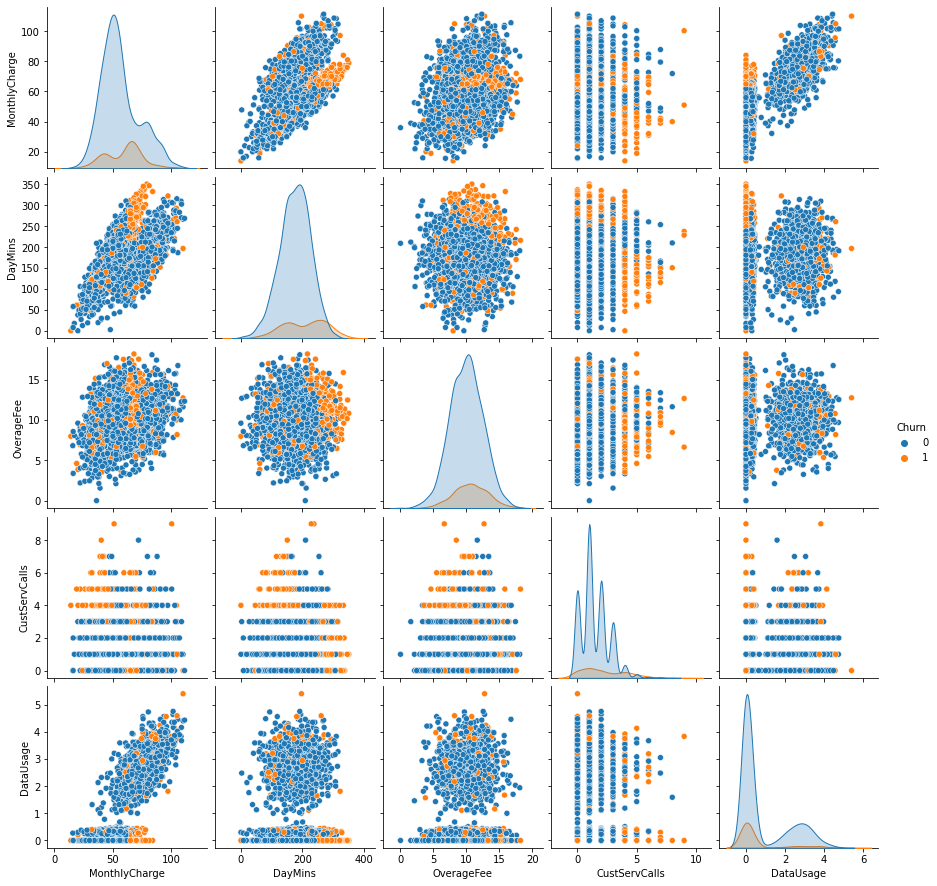

In [249]:
#plotting pairwwise relationships
sns.pairplot(important,hue='Churn')
plt.show()


## Investigation direction:
### -Clearly from the diagram above most variables seem to have a non-linear relationship thus a logistic regrssion classifier would nit be suitable

# Splitting the dataset(train and test dataset)

In [186]:
#independent and dependent variable
X=df[['MonthlyCharge','DataUsage','DayMins','OverageFee','DataPlan','AccountWeeks','RoamMins','ContractRenewal','DayCalls','CustServCalls']]
y=df[['Churn']]

#splitting the dataset into training and testing data randomly.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) #commonly used random states are 0 and 1.



In [200]:
#combining the  train and test
train=pd.concat([X_train,y_train],axis=1)
test=pd.concat([X_test,y_test],axis=1)

#exporting files to a train and test csv file.
train.to_csv("train_.csv",index=False)
test.to_csv("test_.csv",index=False)

## Univariate outliers

In [31]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[None, None]

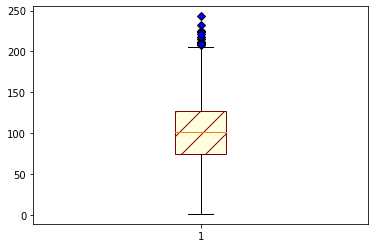

In [43]:
# using a box plot
Accweeks=df['AccountWeeks']
#converting the data into an array
Accweeks_array=np.array(Accweeks)
Accweeks_array
#drawing the boxplot to identify the outliers
bp1=plt.boxplot(Accweeks_array,patch_artist=True)
bp1['boxes'][0].set(facecolor='lightyellow',edgecolor='maroon',
                    hatch='/')
bp1['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')


[None, None]

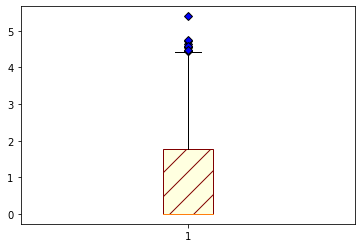

In [46]:
DataUse=df['DataUsage']
#converting the data into an array
DataUse_array=np.array(DataUse)
#ploting a box plot to identify outliers
bp2=plt.boxplot(DataUse_array,patch_artist=True)
bp2['boxes'][0].set(facecolor='lightyellow',edgecolor='maroon',
                    hatch='/')
bp2['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')


[None, None]

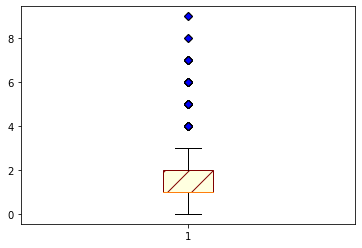

In [47]:
custcalls=df['CustServCalls']
#converting the data into an array
custcall_array=np.array(custcalls)
#plotting the boxplot
bp3=plt.boxplot(custcall_array,patch_artist=True)
bp3['boxes'][0].set(facecolor='lightyellow',edgecolor='maroon',
                    hatch='/')
bp3['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')

[None, None]

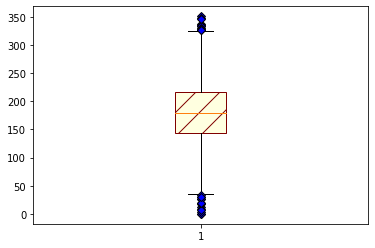

In [48]:
daymin=df['DayMins']
#converting the data into an array
daymin_array=np.array(daymin)
#plotting the boxplot
bp4=plt.boxplot(daymin_array,patch_artist=True)
bp4['boxes'][0].set(facecolor='lightyellow',edgecolor='maroon',
                    hatch='/')
bp4['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')

[None, None]

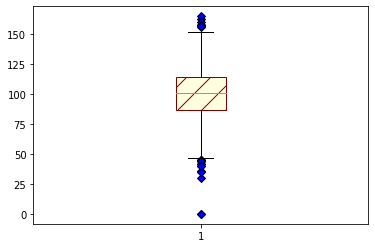

In [49]:
daycall=df['DayCalls']
#converting the data into an array
daycall_array=np.array(daycall)
#plotting the boxplot
bp5=plt.boxplot(daycall_array,patch_artist=True)
bp5['boxes'][0].set(facecolor='lightyellow',edgecolor='maroon',
                    hatch='/')
bp5['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')

[None, None]

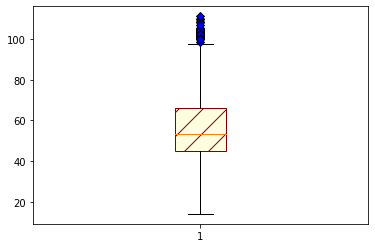

In [50]:
moncharge=df['MonthlyCharge']
#converting the data into an array
moncharge_array=np.array(moncharge)
#plotting the boxplot
bp6=plt.boxplot(moncharge_array,patch_artist=True)
bp6['boxes'][0].set(facecolor='lightyellow',edgecolor='maroon',
                    hatch='/')
bp6['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')